# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [19]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline

import plotly.io as pio
pio.renderers.default = 'colab'


### Understanding the structure of the data

In [10]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# read the data
df = pd.read_csv('/Users/user/Desktop/GreatLearning/Project1/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Data format summary:

* `order_id`: A unique identifier for the order, so it should be an integer.
* `customer_id`: An identifier for the customer, also rightly an integer.
* `restaurant_name`: Name of the restaurant, correctly a string.
* `cuisine_type`: Type of cuisine, correctly a string.
* `cost_of_the_order`: Cost of the order, correctly a float.
* `day_of_the_week`: This indicates the day an order is placed, which is categorical and is correctly a string.
* **`rating`**: Rating given by the customer, is an object instead of an integer because there are "Not Rated" strings mixed with numerical ratings.
* `food_preparation_time`: Time taken by the restaurant to prepare food, correctly an integer representing minutes.
* `delivery_time`: Time taken to deliver the food, correctly an integer representing minutes.

Future notes: If data indicating specific timestamps is acquired (like order placed time, food prepared time, etc.), converted into a date-time format.

In [ ]:
# Checking for missing values in the data by priting the sum of null values for each column
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
This output makes it seem as if there is no missing values in any of the columns. However, 'rating' category actually has some "Not Rated" values which are missing numerical values.

To-do: Leave as is for now but if rating statistical analysis needed transform "Not Rated" into NaN.

In [ ]:
# Transpose(flip) dataframe for better visibility and show all data types for detailed description of each variable
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
* `Order ID:`The IDs range from 1,476,547 to 1,478,444, indicating the dataset likely contains consecutive order IDs from this range.

* `Customer ID:` Span a wide range, from 1,311 to 405,334. Not consecutive.

* `Restaurant Name:` There are 178 unique restaurants in the dataset. The most frequent is "Shake Shack".

* `Cusine Type:` There are 14 unique types of cuisines. The most popular is "American".

* `Cost of the Order:` The average cost of an order is about 16.50 dollars. Orders range from 4.47 to 35.41 dollars, indicating a diverse range of order values.

* `Day of the Week:` There are two unique values: "Weekday" and "Weekend". A majority of the orders (1,351 out of 1,898) are placed on weekends.

* `Rating:` There are 4 unique rating values. A significant portion of the orders (736 out of 1,898) have not been given a rating (indicated as "Not given").

* `Food Preparation Time:` On average, it takes approximately 27.37 minutes to prepare food once an order is placed. The preparation time ranges from a minof 20mins to a maxof 35mins. The interquartile range (between the 25th percentile and the 75th percentile) is from 23mins to 31mins, indicating that the middle 50% of the orders are prepared within this time frame.

* `Delivery Time:` The average time taken to deliver an order, after it's prepared, is approximately 24.16 minutes. Delivery times range from a min of 15min to a maxi of 33min. The middle 50% of the orders are delivered between 20min and 28min.

In [ ]:
#Print the each unique value in the rating column and the frequency of each
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
**Not given**: This represents the number of orders that haven't received a rating. There are 736 such orders.

**5**: This represents the number of orders that received a rating of 5. There are 588 orders with this rating.

**4**: This indicates the orders that received a rating of 4. There are 386 orders with this rating.

**3**: This is the count of orders that got a rating of 3. There are 188 orders with this rating.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

List of variables to analyze individually:
1. `Order ID`
2. `Customer ID`
3. `Restaurant Name`
4. `Cusine Type`
5. `Cost of the Order`
6. `Day of the Week`
7. `Rating`
8. `Food Preparation Time`
9. `Delivery Time`


#### `1. Order ID`

In [ ]:
# check unique order IDs
df['order_id'].nunique()

1898

Obeservations:

The statistical summary of the data showed that the Order IDs range from 1,476,547 to 1,478,444.

The total number of integers (max-min+1) in the range is 1,898. This matches the total number of rows in the dataset, confirming there are no missing Order IDs or a gap in this sequence.

#### `2. Customer ID`

In [ ]:
# check unique customer IDs
df['customer_id'].nunique()

1200

Observations:

The statistical summary of the data showed that the Customer IDs range from 1,311 to 405,334.

The total number of integers (max-min+1) in the range is 404,024 which is much larger than the total unique customer IDs (1200).  

This spread suggests:

* A varied customer base with both early and more recent customers (assuming Customer IDs are also assigned sequentially).

* A single customer might make multiple orders thus a unique customer ID appears multiple times.

In [ ]:
#Check for duplicate customer IDs
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

In [ ]:
#Segment costumenrs based on their order frequency
# Count the number of orders for each customer ID
customer_order_counts = df['customer_id'].value_counts()

# Define the segmentation function
def segment_customer(count):
    if count == 1:
        return 'One-time:'
    elif count <= 5:
        return 'Occasional (2-5 orders):'
    else:
        return 'Regular(5+ orders):'

# Apply the segmentation function
customer_segments = customer_order_counts.apply(segment_customer)

# Count how many customers fall into each segment
segment_counts = customer_segments.value_counts()
segment_counts

One-time:                   784
Occasional (2-5 orders):    402
Regular(5+ orders):          14
Name: customer_id, dtype: int64

Obesrvations:

Investigating duplicate customer ID's and segmenting the ones that appeared more than once into the following groups:
* One-time: Customers who have made only 1 order.
* Occasional: Customers who have made 2 to 5 orders.
* Regular: Customers who have made more than 5 orders.
shows that a significant portion of the customer base consists of one-time customers (784), suggesting that the platform is struggling with retention.

#### `3. Restaurant Name`

In [ ]:
# check unique Restaurant Names
df['restaurant_name'].nunique()

178

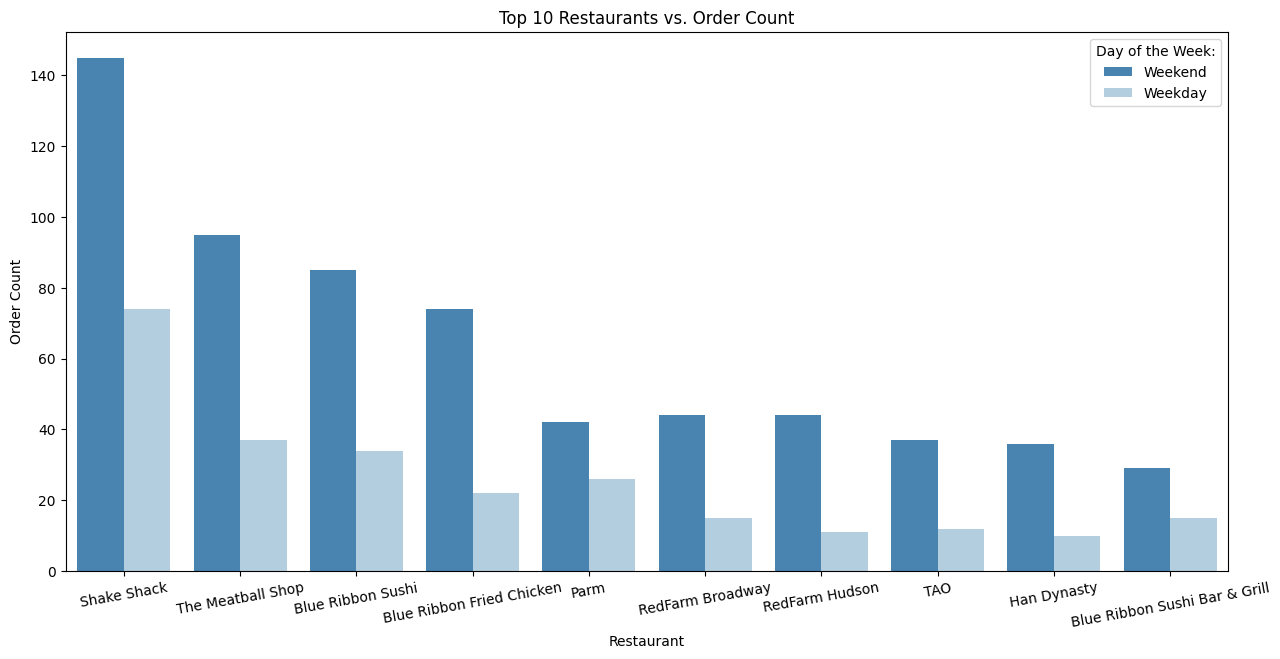

In [ ]:
# Visualization for top 10 restaurants by order count to get an idea of the most popular restaurants
top_n = 10
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='restaurant_name' , order=df['restaurant_name'].value_counts().index[:top_n], hue='day_of_the_week', palette='Blues_r')
plt.title('Top {} Restaurants vs. Order Count'.format(top_n))
leg = plt.legend(title='Day of the Week:')
plt.ylabel('Order Count')
plt.xlabel('Restaurant')
plt.xticks(rotation = 10);

Observations:

The order volume is higher during the weekend than weekdays for all top 10 restaurants.

Further revenue analysis of order prices and total profit will determine weather order volume is positively correlated to profit.

Additionally, future timestamp data would provide further insight in terms of order volume per day type and inform resource allocation during peak times.

#### `4. Cusine Type`

In [ ]:
# Check unique cuisine type
df['cuisine_type'].nunique()

14

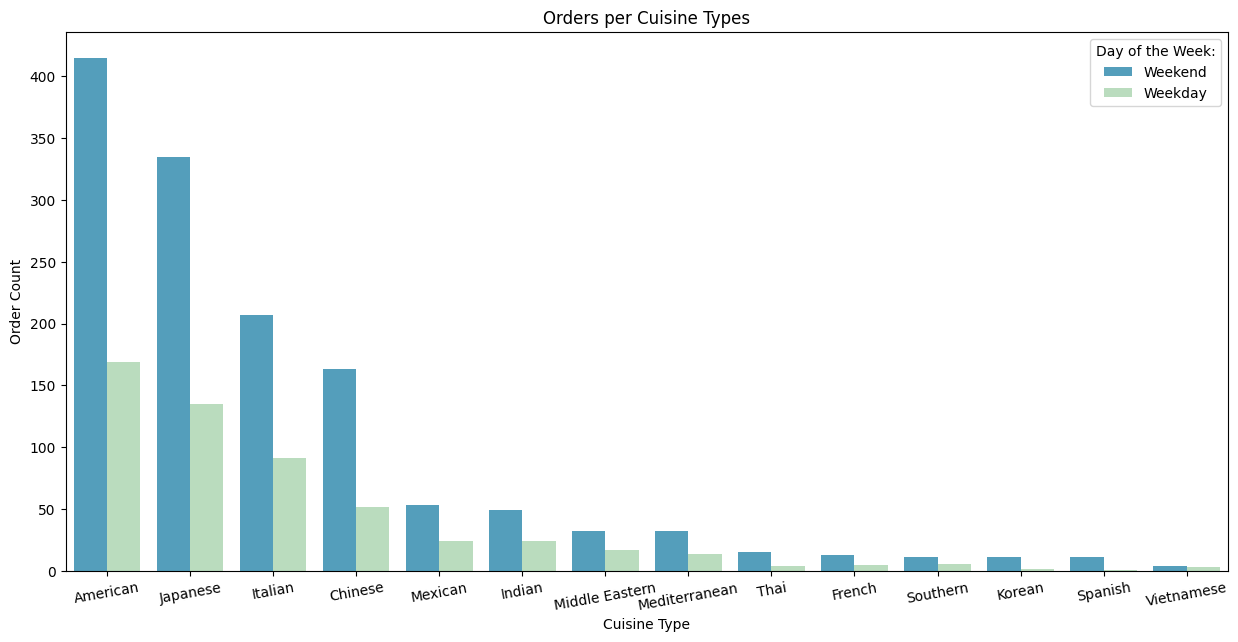

In [ ]:
# Visualize all cuisine types since only a few
plt.figure(figsize = (15,7))
sns.countplot(data = df, x = 'cuisine_type',
              order = df['cuisine_type'].value_counts().index, hue='day_of_the_week', palette='GnBu_r')
plt.title('Orders per Cuisine Types')
leg = plt.legend(title='Day of the Week:')
plt.ylabel('Order Count')
plt.xlabel('Cuisine Type')
plt.xticks(rotation = 10);

Observations:

The most popular cuisine type, regardless of the day of the week, is "American" followed by "Japanese", "Italian" and "Chinese".

Similar to orders per restaurant, cuisine type orders have a higher count on weekends accross the board.  

Most cuisines have a fairly consistent order count on both weekdays and weekends

Peak days damand of certain cuisine type can aid in efficient planning of stock for each day type and staff scheduling for operational efficiency.

#### `5. Cost of the Order`

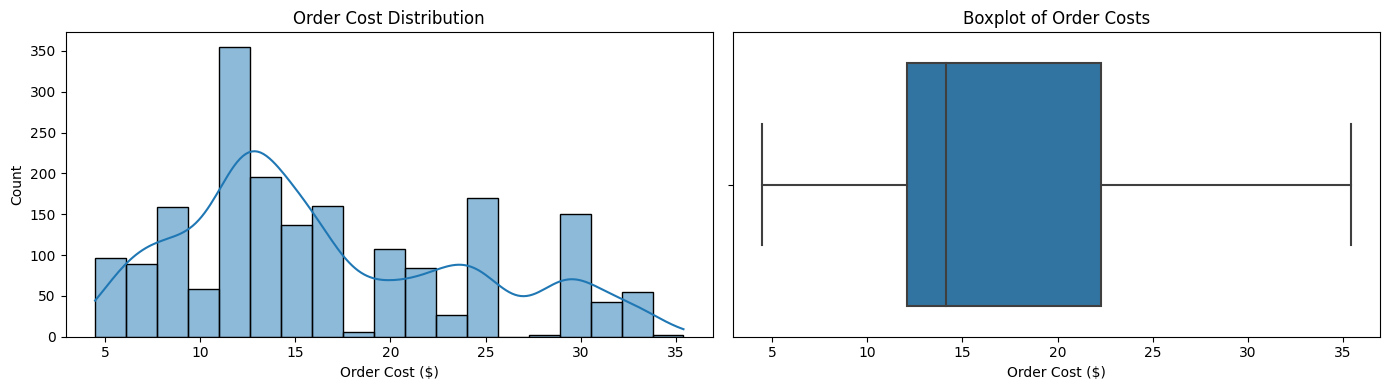

In [ ]:
plt.figure(figsize=(14, 4))

# First plot: Histogram visualizing the frequency distribution of order costs
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.histplot(data=df, x='cost_of_the_order', kde=True)
plt.title('Order Cost Distribution')
plt.xlabel('Order Cost ($)')

# Second plot: Boxplot summary of the central tendency, variability, and skewness of the order cost distribution
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.boxplot(data=df, x='cost_of_the_order', whis=1.5)
plt.title('Boxplot of Order Costs')
plt.xlabel('Order Cost ($)')

plt.tight_layout();

Observations:

**Histogram (Order Cost Distribution)**:

The majority of orders seem to be clustered in the lower cost range, suggesting that most customers prefer or tend to order items that are less expensive.

There's a peak (or mode) in the lower cost range, indicating the most common order price range.

The distribution is right-skewed, meaning there are fewer high-cost orders but they do exist.

**Boxplot (Boxplot of Order Costs)**:

The median (the line in the middle of the box) gives the central value of the order cost.

The interquartile range (IQR, the width of the box) gives the range within which the central 50% of the values lie.

Whiskers extend to 1.5 * IQR above and below the box, indicate a wide range of order values.

There are no points outside of the whiskers (outliers) so there are no very high-cost orders outside of the typical range.


#### `6. Day of the Week`

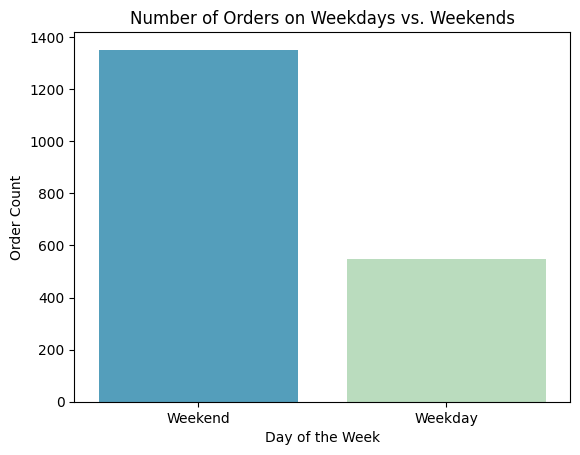

In [ ]:
#Visualize the total number of orders placed on weekdays vs. weekends.
sns.countplot(data=df, x='day_of_the_week', palette='GnBu_r')  ## Countplot for weekdays vs. weekends
plt.title('Number of Orders on Weekdays vs. Weekends')
plt.ylabel('Order Count')
plt.xlabel('Day of the Week');

Observations:

There are two unique values: "Weekday" and "Weekend". A majority of the orders (1,351 out of 1,898) are placed on weekends.

This data shows clear "Weekend" order preferences which can have operational implications. Marketing and other strategies can be implemented to balance out the demand and keep a steady flow of orders throughout the week.

#### `7. Rating`

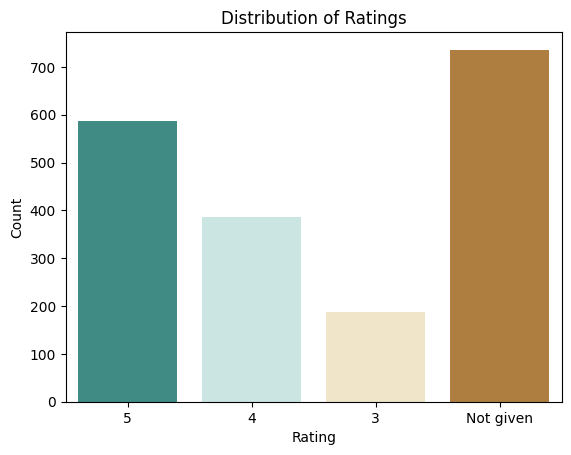

In [ ]:
#Visualize the distribution of ratings
sns.countplot(data=df, x='rating', palette='BrBG_r', order=['5', '4', '3', 'Not given'])
plt.title('Distribution of Ratings')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.show()

Observations:

Rating of 5: This is the most common rating, indicating that a large number of customers are highly satisfied with their orders.

Rating of 4: The second most common rating. This suggests that many customers had a generally good experience.

Rating of 3: Fewer orders received this rating, showing that there's a smaller portion of customers who had a mediocre experience. While the number of 3-star ratings is relatively low, it's crucial to investigate these orders to understand what went wrong and ensure the continual improvement of services.

Not given: A significant number of orders did not receive a rating. This could be due to several reasons such as customers not bothering to rate, system glitches, or new orders that haven't been rated yet. This too is an opportunity for the company to find ways to engage with these customers to gather feedback and potentially improve their services.



#### `8. Food Preparation Time`

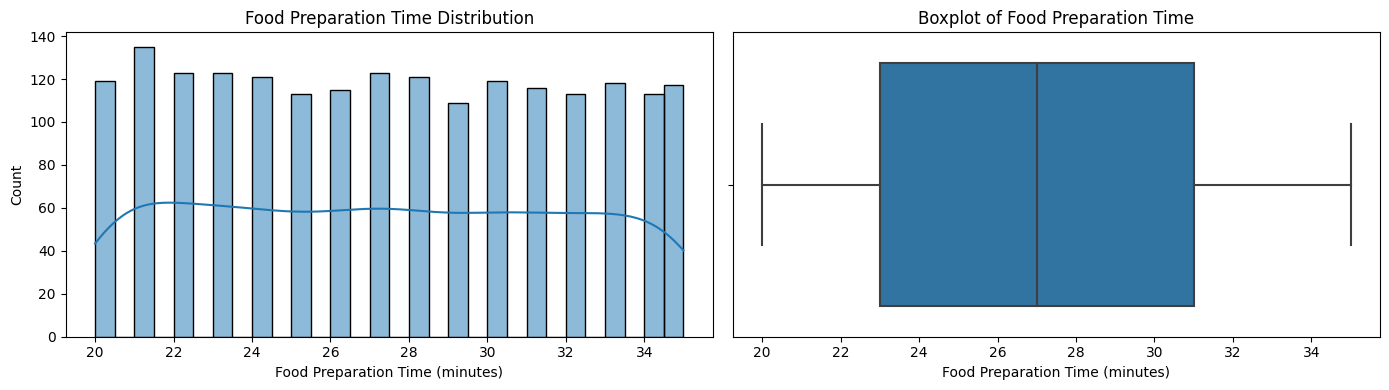

In [ ]:
plt.figure(figsize=(14, 4))

# First plot: Histogram visualizing the frequency distribution of food preparation time
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.histplot(df['food_preparation_time'], bins=30, kde=True)
plt.title('Food Preparation Time Distribution')
plt.xlabel('Food Preparation Time (minutes)')

# Second plot: Boxplot summary of the central tendency, variability, and skewness of the food preparation time distribution
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.boxplot(data=df, x= 'food_preparation_time', whis=1.5)
plt.title('Boxplot of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')

plt.tight_layout()
plt.show()



**Histogram (Food Preparation Time Distribution)**:

The almost symetric histogram indicates that the food preparation time is somewhat normally distributed.


**Boxplot (Boxplot of Order Costs)**:


On average, it takes approximately 27 minutes to prepare food once an order is placed.

The preparation time ranges from a minimum of 20 minutes to a maximum of 35 minutes but 50% of the orders are prepared within 23 minutes to 31 minutes.

There are no outliers, or unusually short or long food preparation times.

#### `9. Delivery Time`

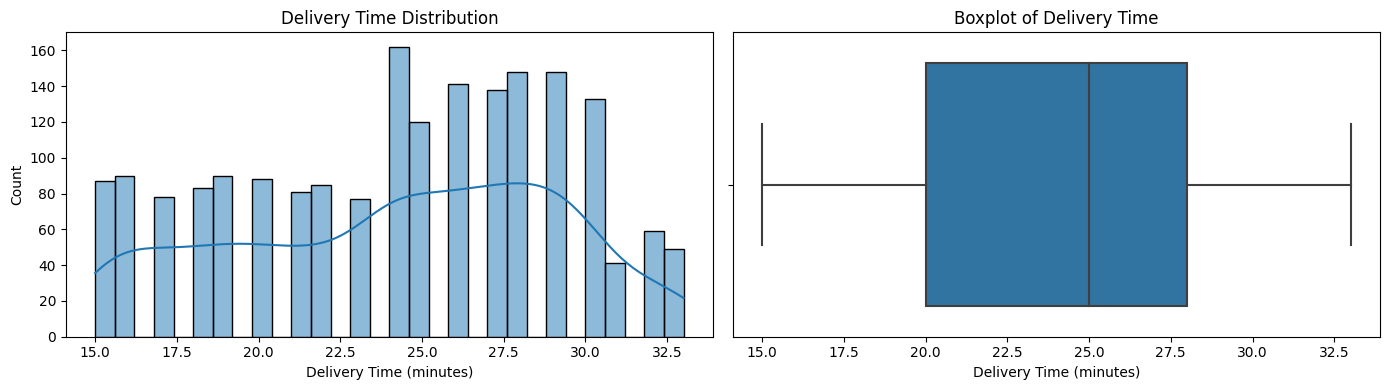

In [ ]:
plt.figure(figsize=(14, 4))

# First plot: Histogram visualizing the frequency distribution of delivery time
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.histplot(df['delivery_time'], bins=30, kde=True)
plt.title('Delivery Time Distribution')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Count')

# Second plot: Boxplot summary of the central tendency, variability, and skewness of the delivery time distribution
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.boxplot(data=df, x='delivery_time', whis=1.5)
plt.title('Boxplot of Delivery Time')
plt.xlabel('Delivery Time (minutes)')

plt.tight_layout()
plt.show()

Observations:
**Histogram (Delivery Time Distribution)**:

The histogram is scewed to the left and indicates that the food delivery time orders are clustered between 20 to 30 minutes with the highest occurance at 24 minutes.

**Boxplot (Boxplot of Delivery Time)**:

More specific and complimentary information from the negatively scewed boxplot shows the middle 50% of the orders are delivered between 20 minutes and 28 minutes.

Overall, the combined visualizations suggest that the food aggregator company is generally efficient in delivering orders, with most being delivered within half an hour.

In [ ]:
# Get top 5 restaurants with the highest number of orders
top_5_restaurants = df['restaurant_name'].value_counts().head(5)
top_5_restaurants

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:

"Shake Shack" is the most popular restaurant in this dataset with 219 orders, followed by "The Meatball Shop", "Blue Ribbon Sushi", "Blue Ribbon Fried Chicken", and "Parm".

In [13]:
# Get orders that cost above 15 dollars
df_greater_than_15 = df[df['cost_of_the_order'] > 15]

# Calculate the number of total orders where the cost is above 20 dollars
print('Total orders that cost above 15 dollars:', df_greater_than_15.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_15.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 15 dollars:", round(percentage, 2),'%')


Total orders that cost above 15 dollars: 890
Percentage of orders above 15 dollars: 46.89 %


In [ ]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')


The mean delivery time for this dataset is 24.16 minutes


#### Observations:

The average time taken to deliver an order is approximately 24 minutes. This suggests that, on average, customers can expect their food to be delivered in a little under 25 minutes after it's ready for pickup.

A delivery time of around 24 minutes is relatively swift, especially if we consider urban areas like NYC with potential traffic and multiple delivery stops. This information indicates an efficient delivery system and can be used as a marketing point to attract more customers.


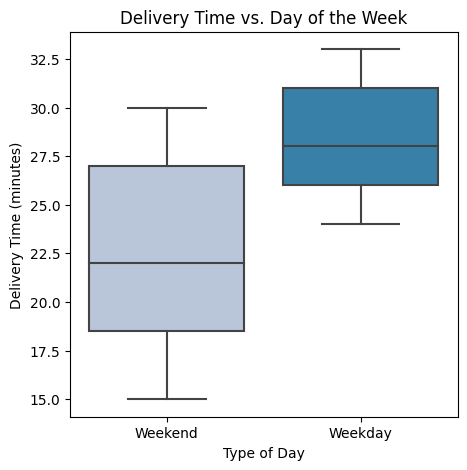

In [79]:
# Display how delivery times vary between weekdays and weekends.
plt.figure(figsize=(5,5))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')
plt.title('Delivery Time vs. Day of the Week')
plt.ylabel('Delivery Time (minutes)')
plt.xlabel('Type of Day')
plt.show()

In [ ]:
# Average delivery time by day of the week
delivery_by_day = df.groupby('day_of_the_week')['delivery_time'].mean().sort_values()
delivery_by_day

day_of_the_week
Weekend    22.470022
Weekday    28.340037
Name: delivery_time, dtype: float64

Observations:

On avarage, Delivery time seem to be 6 minutes faster in the weekend (22.5 minutes) than weekdays (28.3 minutes) which is _very intresting_ given that order volume is much higher during the weekend too and one would think that slows things down.

The faster weekend delivery time could be one of the resons for the higher volume of orders during the weekend.

Future analysis: further analysis between delivery time and other factors not included in this dataset (e.g., time of the day, restaurant location), can derive more specific insights and recommendations.

In [83]:
# Calculate mean delivery time for each restaurant
restaurant_delivery_times = df.groupby('restaurant_name')['delivery_time'].mean().sort_values()

# Display the top restaurants with the fastest average delivery times
fastest_restaurants = restaurant_delivery_times.head(20)  # Adjust the number to see more or fewer restaurants
fastest_restaurants

restaurant_name
Gaia Italian Cafe              15.000000
Paul & Jimmy's                 15.000000
The MasalaWala                 15.000000
Hibino                         15.000000
Coppola's East                 16.000000
Galli Restaurant               16.000000
Wo Hop Restaurant              16.000000
Market Table                   17.000000
Byblos Restaurant              18.000000
Samurai Mama                   18.000000
Schnipper's Quality Kitchen    18.666667
Lamarca Pasta                  19.000000
Big Daddy's                    19.000000
Kambi Ramen House              19.000000
Cho Dang Gol                   19.333333
Delicatessen                   19.400000
DespaÌ±a                       19.500000
Hampton Chutney Co.            20.000000
Moonstruck on Second           20.000000
Socarrat Paella Bar            20.000000
Name: delivery_time, dtype: float64

Observations:

Also intrestingly this list of fastest delivering restaurants does not include the top 10 most popular restaurants (based on orders) which seems to sugest that there is no relationship between speed of delivery and orders.

Continue further investigation of this correlation:

In [14]:
# Group by restaurant name and count the orders
restaurant_orders = df['restaurant_name'].value_counts().reset_index()
restaurant_orders.columns = ['Restaurant', 'Number of Orders']
fig = px.bar(restaurant_orders, x='Restaurant', y='Number of Orders', title='Number of Orders from Each Restaurant')
# fig.show()

# Calculate average delivery time for each restaurant
average_delivery_time = df.groupby('restaurant_name')['delivery_time'].mean().reset_index()
average_delivery_time.columns = ['Restaurant', 'Average Delivery Time']

# Merge the order count and average delivery time dataframes
merged_data = pd.merge(restaurant_orders, average_delivery_time, on='Restaurant')

# Create the bar plot
fig = px.bar(merged_data, x='Restaurant', y='Number of Orders', title='Number of Orders from Each Restaurant with Delivery Time',
             color='Average Delivery Time', color_continuous_scale='GnBu', labels={'color':'Avg Delivery Time (minutes)'})

# Adjust the plot size and color bar position
fig.update_layout(width=2090, height=900, coloraxis_colorbar_x=0.9, coloraxis_colorbar_y=0.5)


fig.show()

Observation:

This interactive bar chart further investigates the delivery time and orders made per each restaurant allowing to hover over each bar for detailed order count and avarage delivery time information for each restaurant of interest.

It also shows that the top 20 restaurants with the most sales do not constitute the top 20 fastest delivering restaurants list (displayed above) indicating no seeming correlation between these two variable.  

Some restaurants clearly dominate in popularity as we have seen before and this could be attributed to factors like cuisine type, service quality, or location.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Get the counts of each customer_id
top_3_customers = df['customer_id'].value_counts().head(3)
top_3_customers

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:

Customer ID:  | Order amount:
-------------------|------------------
52832       | 13
47440        |  10
83287 |9



### Multivariate Analysis

#### Correlation Matrix

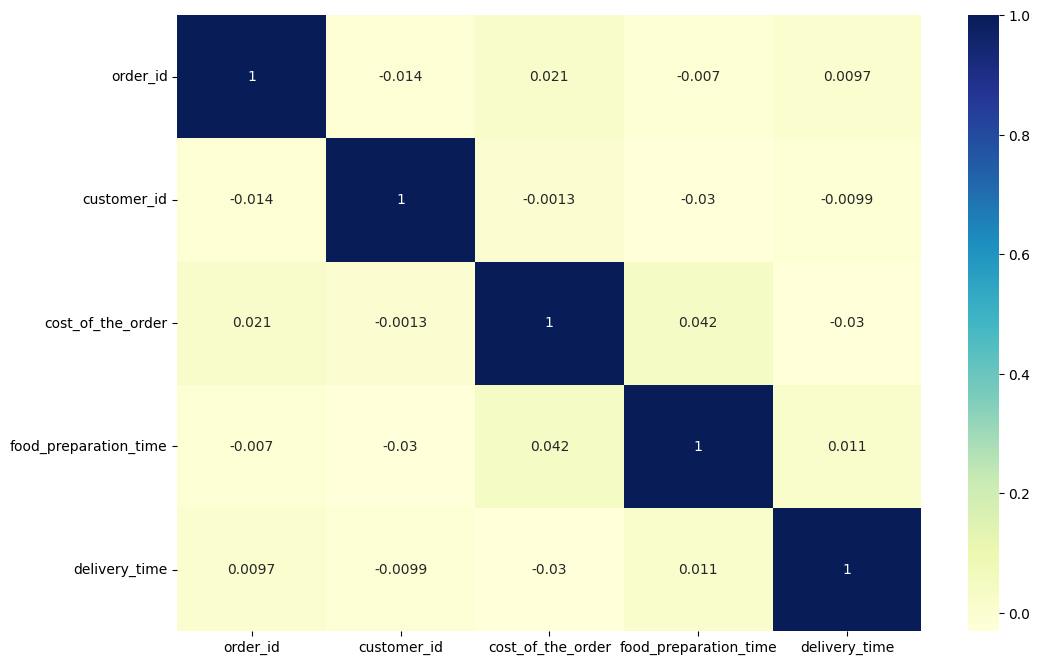

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df[['order_id', 'customer_id', 'cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']].corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.show()

Observations:

There are no significant correlations between the numerical values.
Categorical values did not show up thus must be examined separately.

#### Contingency Table - Restaurants
Restaurants vs. Day of the Week

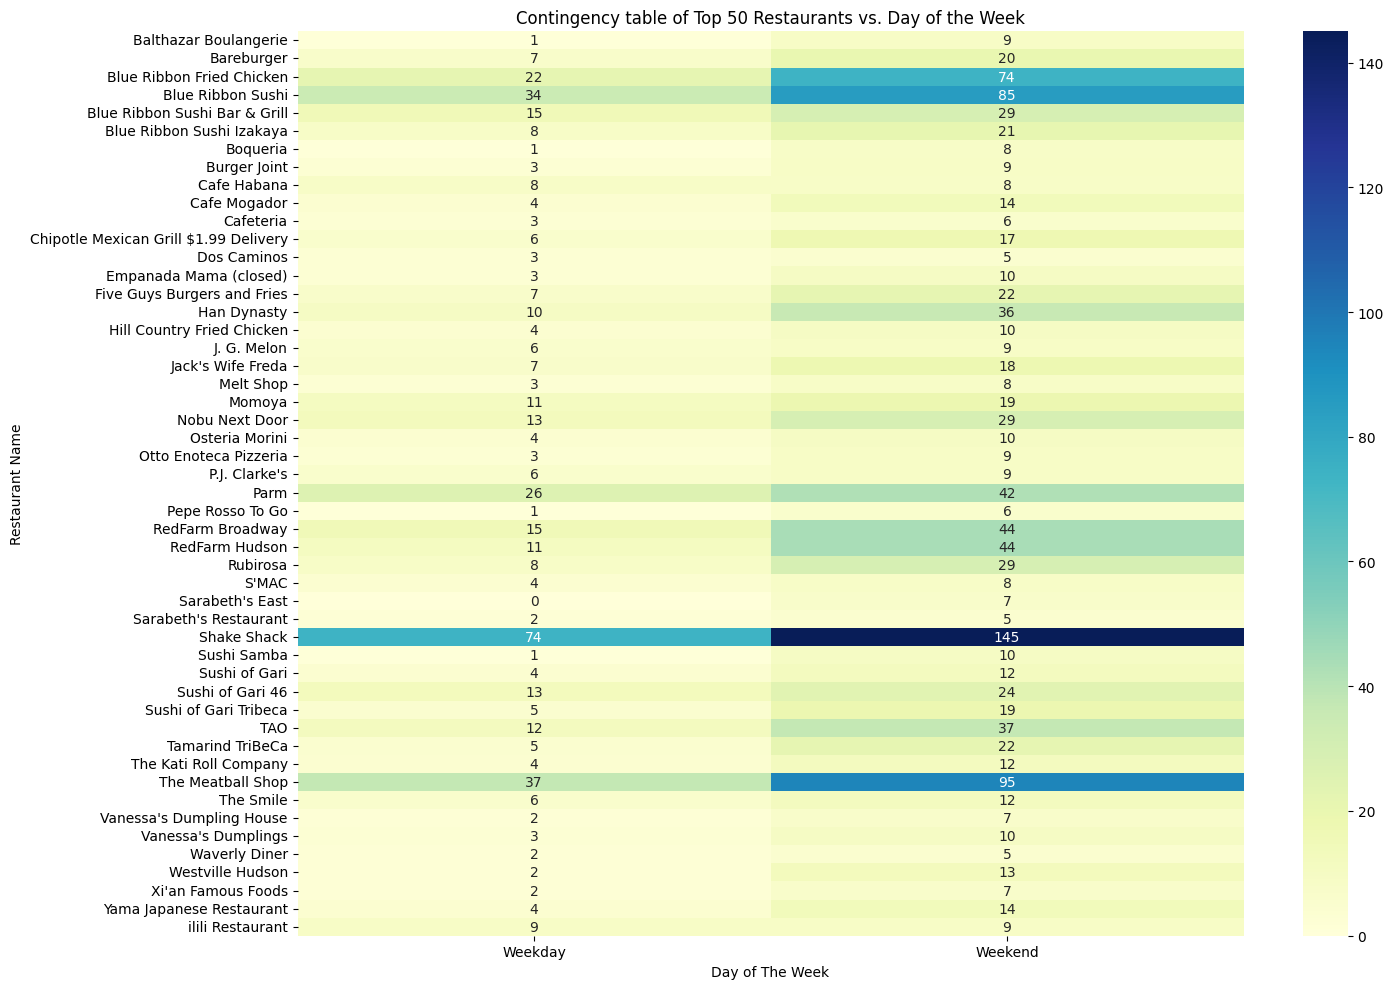

In [ ]:
# Focus on top 50 restaurants with highest number of orders
top_restaurants = df['restaurant_name'].value_counts().head(50).index
filtered_df = df[df['restaurant_name'].isin(top_restaurants)]

# Create a contingency table
contingency_table = pd.crosstab(filtered_df['restaurant_name'], filtered_df['day_of_the_week'])

# Heatmap plot
plt.figure(figsize=(15,10))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Contingency table of Top 50 Restaurants vs. Day of the Week')
plt.ylabel('Restaurant Name')
plt.xlabel('Day of The Week')
plt.tight_layout()
plt.show()

Observations:

Each cell value indicates the order count for a particular restaurant on either a Weekday or a Weekend with more positive correlations on Weekend as previously discussed.


#### Contingency Table - Ratings
Ratings Count by Day of the Week

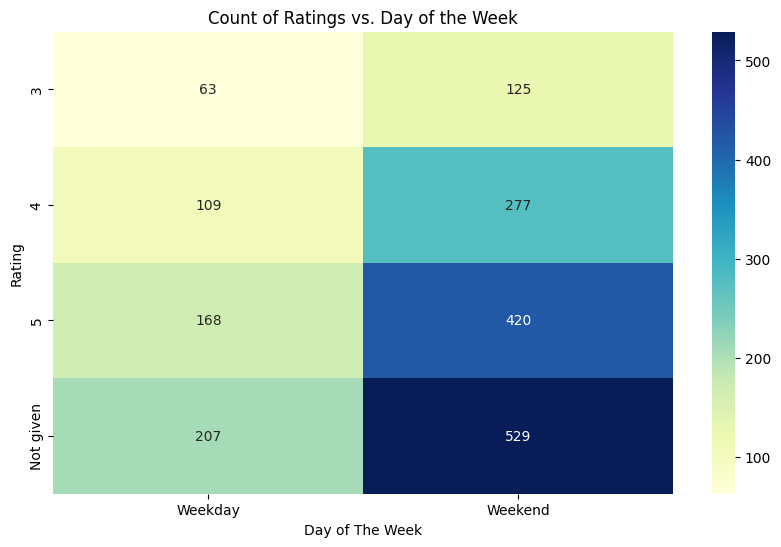

In [ ]:
# Creating a contingency table for 'day_of_the_week' and 'rating'
contingency_table_rating = pd.crosstab(df['rating'], df['day_of_the_week'])

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table_rating, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Count of Ratings vs. Day of the Week')
plt.ylabel('Rating')
plt.xlabel('Day of The Week')
plt.show()

Observations:
The heatmap depicts a contingency table comparing the count of ratings (i.e., 3, 4, 5, and 'Not given') against the days of the week (Weekday or Weekend).

We have seen earlier (Question 6, section 7) that (aside from the "Not given" the most common rating is 5 followed by 4 and then 3. Here we see that there is a positive corrolation between rating and Weekend day in the same order.

Given that the count of orders is also higher on weekends (as observed in previous analyses), there are also more ratings provided during this time, consistent with the higher order volume.


#### Cuisine Type Popularity

In [58]:
# Visualize all cuisine types for the weekend in descending order
cuisine_counts = df['cuisine_type'].value_counts().reset_index()
cuisine_counts.columns = ['Cuisine Type', 'Number of Orders']

# Custom color palette
colors = ['#457B9D',  '#A8DADC', '#F4A261','#2A9D8F',  '#1D3557', '#F1FAEE', '#2A9D8F', '#264653']

fig = px.pie(cuisine_counts, names='Cuisine Type', values='Number of Orders', title='Distribution of Orders by Cuisine Type',
             color_discrete_sequence=colors)

fig.show()


Observations:

The pie chart showcases the distribution of orders based on cuisine type.
"American" cuisine is the most popular followed by "Japanese", "Italian", and "Chinese".

Other cuisines have much smaller shares, suggesting either niche preferences or limited availability. Further investigationg the cause would aid in identifying demand-supply mismatch in certain cuisines, which might be beneficial to then onboard more restaurants of that type or promote the existing ones more actively.

#### Cuisine vs Cost of the Order

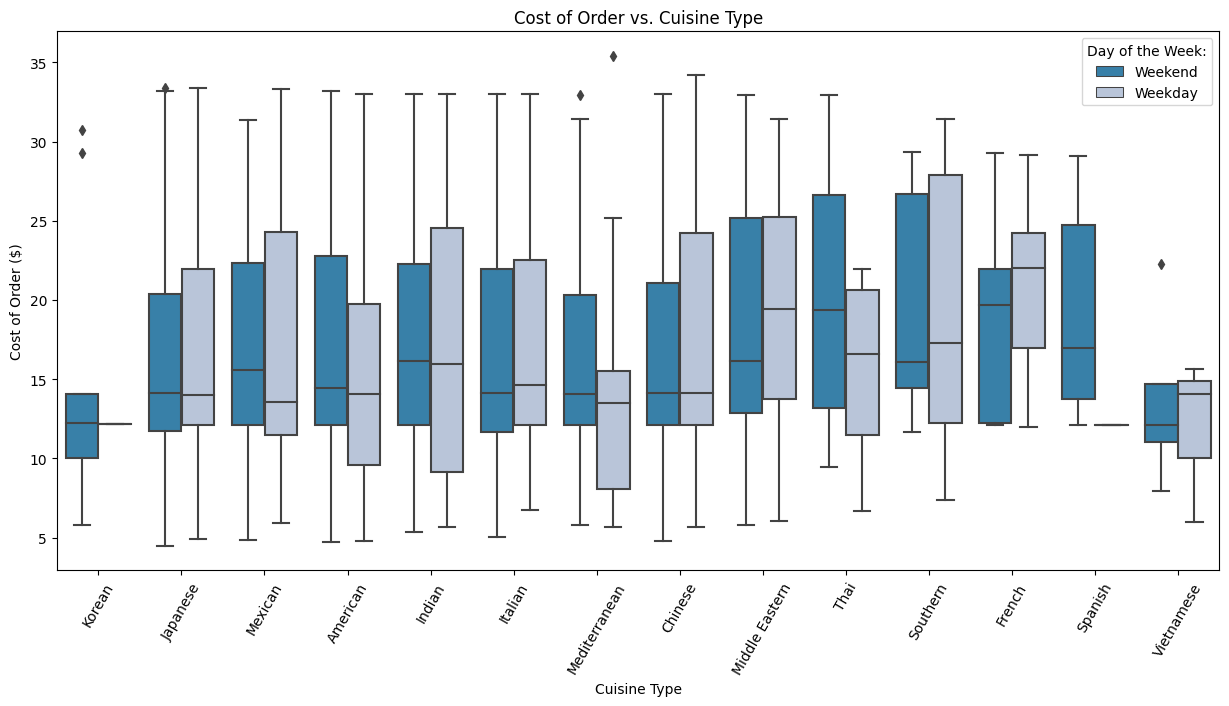

In [106]:
# This will show the relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df,hue='day_of_the_week', palette = 'PuBu_r')
plt.title('Cost of Order vs. Cuisine Type')
leg = plt.legend(title='Day of the Week:')
plt.ylabel('Cost of Order ($)')
plt.xlabel('Cuisine Type')
plt.xticks(rotation = 60)
plt.show()

Observations:

Variability in Costs: There's a wide variability in order costs and median cost across different cuisine types with 'Korean' and 'Vietnamese having the lowest order costs.

Presence of Outliers: Several cuisines have multiple outliers on the higher end of the cost spectrum. This suggests that there are certain specialty dishes or combinations in these cuisines that are priced much higher than the typical dishes.

Skewness: For most cuisines, the distribution of order costs is right-skewed, indicating that while most orders are clustered around a lower price point, there are a few orders that are much more expensive.


#### Cuisine vs Food Preparation Time

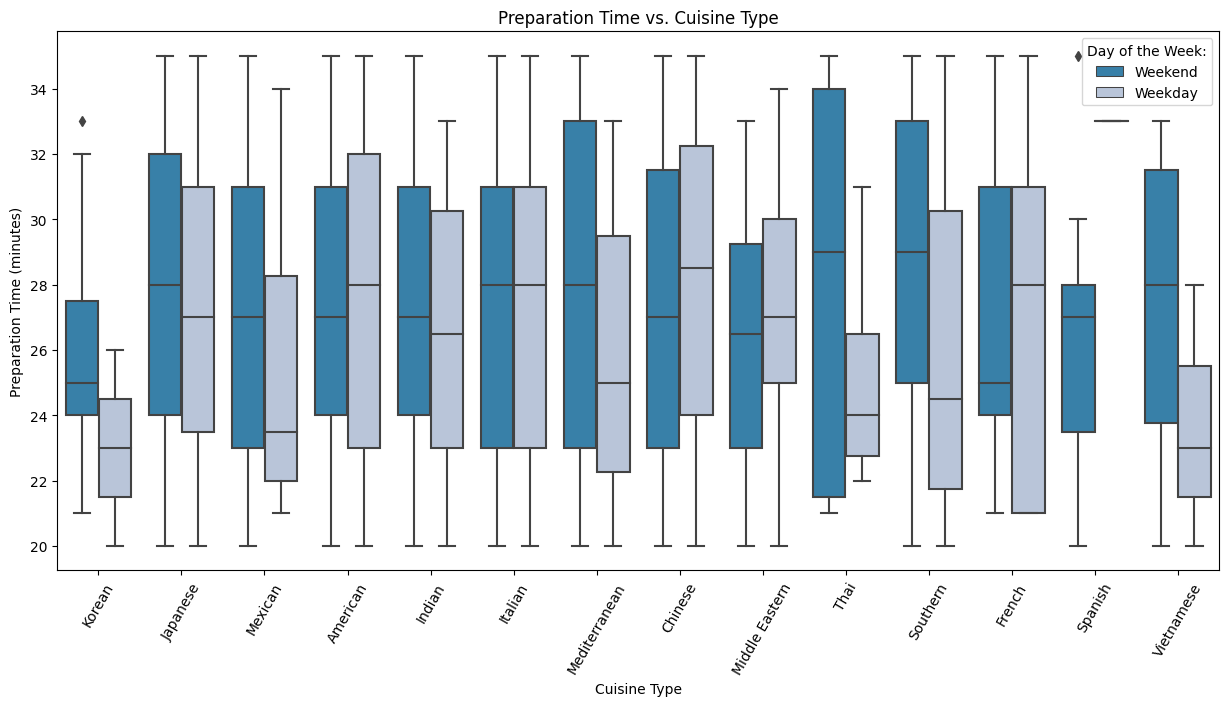

In [107]:
# This will show how different cuisines vary in terms of preparation time
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df,hue='day_of_the_week', palette = 'PuBu_r')
plt.title('Preparation Time vs. Cuisine Type')
leg = plt.legend(title='Day of the Week:')
plt.ylabel('Preparation Time (minutes)')
plt.xlabel('Cuisine Type')
plt.xticks(rotation = 60)
plt.show()

Observations and Insights:

Variability in Preparation Time: Different cuisines exhibit distinct ranges in food preparation times. For instance, cuisines like "French" and "Thai" show a broader range of preparation times compared to others and a significant diffrence between weekdays and weekends while others like "Italian" remaining relatively the same.

Median Preparation Times and outliers: Cuisines like "Spanish" and "Korean" show lowest median preparation times compared to others and exhibit outliers, indicating that certain dishes or orders took an exceptionally long time to prepare. This could hint at the complexity or intricacy of dishes in these cuisines, staffing issues, or other technical or inventory issues.


Business Implications:
Menu Optimization: Restaurants with a broader range of preparation times might consider menu optimization. They can identify dishes that consistently take longer to prepare and see if there are ways to streamline the process or replace them with faster alternatives.

Customer Expectations: For restaurants serving cuisines with generally longer preparation times, setting customer expectations right and informing them of the expected wait time can help in enhancing customer's experience.

Operational Efficiency: Understanding preparation time trends can help restaurants in staffing decisions, kitchen process optimizations, and inventory management.

Weekend Rush: For preparation times consistently longer over weekends, restaurants might consider special weekend menus or additional staffing to handle the rush.

#### Top Revenue Generating Restaurants

In [5]:
#Run the below code and write your observations on the revenue generated by the restaurants:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(20)

restaurant_name
Shake Shack                              3579.53
The Meatball Shop                        2145.21
Blue Ribbon Sushi                        1903.95
Blue Ribbon Fried Chicken                1662.29
Parm                                     1112.76
RedFarm Broadway                          965.13
RedFarm Hudson                            921.21
TAO                                       834.50
Han Dynasty                               755.29
Blue Ribbon Sushi Bar & Grill             666.62
Rubirosa                                  660.45
Sushi of Gari 46                          640.87
Nobu Next Door                            623.67
Five Guys Burgers and Fries               506.47
Momoya                                    492.13
Chipotle Mexican Grill $1.99 Delivery     491.69
Blue Ribbon Sushi Izakaya                 485.09
Tamarind TriBeCa                          426.71
Jack's Wife Freda                         416.75
Bareburger                                399.74
Name

Observations:

Top Earner: "Shake Shack" is the top revenue-generating restaurant with a total revenue of $3579.53. This might be attributed to its popularity and/or pricing of its menu items.

Volume vs Revenue: While "Shake Shack" had the most orders (as seen in a previous question), it also leads in revenue. This indicates not just high order volume but also potential higher average order costs.

Significant Drop after Top 4: The top 4 restaurants ("Shake Shack", "The Meatball Shop", "Blue Ribbon Sushi", and "Blue Ribbon Fried Chicken") have significantly higher revenues compared to the others in the top 20 list.

Presence of Multiple Outlets: Some brands, like "Blue Ribbon" and "RedFarm", appear more than once, suggesting they have multiple outlets or branches. This could mean that brand recognition and loyalty play a role in generating revenue.

**Revenue vs Ratings: 
It might be interesting to see if there's a correlation between revenue and the average ratings these restaurants receive. A high-revenue restaurant might not necessarily have the best ratings and vice versa.**

Implications:

Strategic Partnerships: The food aggregator could focus on strategic partnerships or promotions with these top revenue-generating restaurants to further boost orders and revenue.

Loyalty Programs: Given the evident popularity of the top restaurants, introducing loyalty programs or special discounts for frequent customers of these restaurants might be beneficial.

**Understanding High Revenue: 
It would be beneficial to understand why certain restaurants have higher revenues. Is it because of their menu, pricing, marketing, or a combination of factors? Insights here can be used to help other restaurants on the platform improve.**

Expand Offerings: For brands with multiple successful outlets, the platform might consider expanding its offerings to include other outlets from the same brand that may not yet be on the platform.

In summary, understanding revenue patterns can guide both the food aggregator platform and the individual restaurants in making informed business and marketing decisions.

#### Rating vs Food Preparation Time and Cost of Order
Investigate weather food preparation time and cost of order effects rating

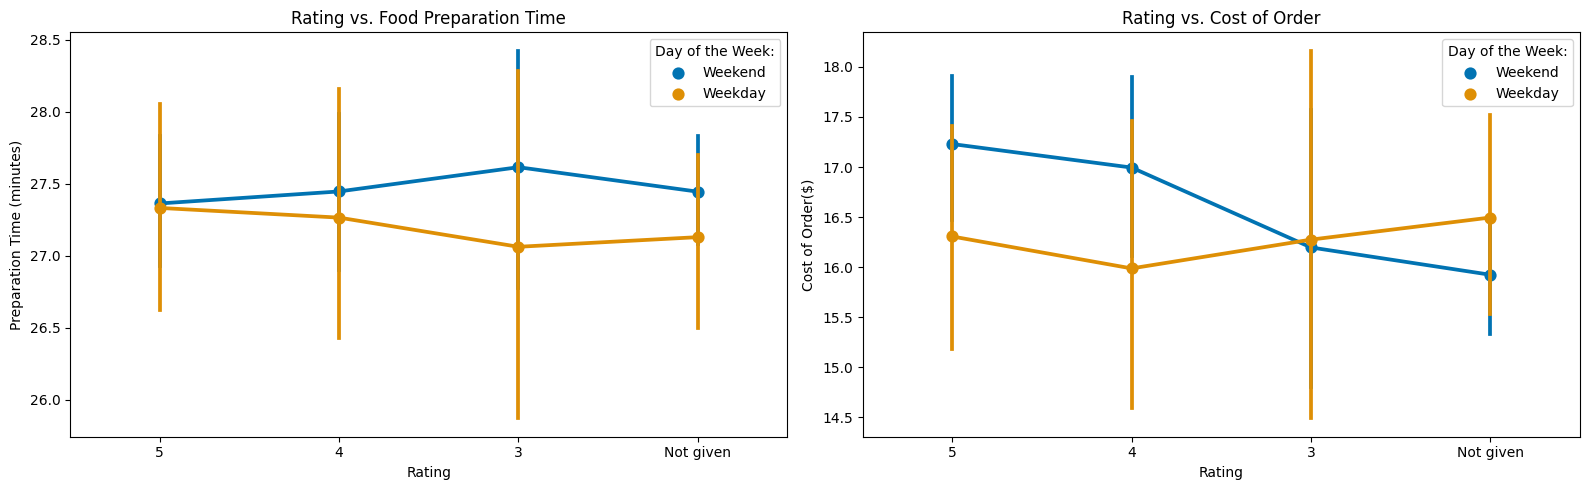

In [8]:
plt.figure(figsize=(16,5))

# First graph: Rating vs. Food Preparation Time
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.pointplot(data = df, x = 'rating', y = 'food_preparation_time', order=['5', '4', '3', 'Not given'], hue='day_of_the_week', palette='colorblind')
plt.title('Rating vs. Food Preparation Time')
leg = plt.legend(title='Day of the Week:')
plt.ylabel('Preparation Time (minutes)')
plt.xlabel('Rating')

# Second graph: Rating vs. Cost of Order
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.pointplot(data = df, x = 'rating', y = 'cost_of_the_order', order=['5', '4', '3', 'Not given'], hue='day_of_the_week', palette='colorblind')
plt.title('Rating vs. Cost of Order')
leg = plt.legend(title='Day of the Week:')
plt.ylabel('Cost of Order($)')
plt.xlabel('Rating')

plt.tight_layout()
plt.show()

Observations:

**Rating vs. Food Preparation Time**:

Food with a rating of 5 seems to have the shortest average preparation time and there's a slight increase in preparation time for foods with a rating of 3 compared to 5 or 4, on weekends especially.

**Rating vs. Cost of Order**:

Rating seems to be decreasing with cost (which is unlikely) and most likely rating and cost are not significantly related at.  

Further statistical testing of these two variables is necessary to determine correlation and significance in order to draw confident conclusions.

Display restaurants with rating count of more than 50 and with an avarage rating of greater than 4. 

In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_final = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

# Filter to get restaurants with average rating greater than 4
df_final[df_final['rating'] > 4]

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:


Given their high average ratings and the fact that they have received a significant number of reviews, these restaurants are prime candidates for promotional offers.

Feedback Mechanism: It's also beneficial to understand the factors driving the high ratings for these restaurants. Are customers praising the food quality, timely delivery, portion sizes, or a combination of several factors? Understanding this can help other restaurants on the platform improve their services.


What would be the total revenue if the company uses a tiered comission strategy (charging 20% for orders above $20 and 15% for orders above $5)

In [17]:
# function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.20
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)  # computing the revenue for each order
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,6.1500
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,5.8400
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [18]:
# get the total revenue and print it
total_rev = df['Revenue'].sum()  # summing up the revenue to get the total
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 5428.56 dollars


#### Observations:

Revenue Streams: The company has generated a net revenue of approximately $5428.6 solely from the commission on orders. This does not account for any other potential revenue streams the platform might have, such as advertisements, partnerships, or premium subscriptions.


High-Value Orders Contribution: A significant portion of this revenue likely comes from orders that are above $20, given the higher commission rate of 25% for such orders. It would be worth investigating since these high-value orders are ideal for most revenue impact. If found to be impactful then promote those orders or deals that encourage users to make those orders.

Analyze Cost Distribution: A deeper analysis of the distribution of order costs could provide insights into how many orders fall into each commission bracket. This can help in refining promotional strategies.


Customer Behavior Analysis: Understanding why customers place high-value orders can help in tailoring the app experience. For instance, are high-value orders typically placed by groups, during specific times, or from certain types of restaurants? Such insights can help in targeted marketing.

In conclusion, a closer look at customer behavior and order patterns can provide further opportunities to optimize and increase this revenue stream.


Look at total time it takes for food to be prepared and delivered upon ordering. 
What percent take over 1 hour to get delivered?

In [ ]:
# Create a new 'total_time' column in the dataframe
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Filter orders that have a total_time greater than 60 minutes
orders_above_60 = df[df['total_time'] > 60]

# Calculate the percentage of such orders in the dataset
percentage_orders_above_60 = (orders_above_60.shape[0] / df.shape[0]) * 100

print("Percentage of orders taking more than 60 minutes:", round(percentage_orders_above_60, 2), '%')

Percentage of orders taking more than 60 minutes: 10.54 %


#### Observations:

Given the output, 10.54% of orders take more than 60 minutes to be delivered from the time they are placed.

Operational Efficiency: A little over 1 in 10 orders takes more than an hour from placement to delivery. If customers expect faster deliveries, then this could be a concern.

Influenced by Various Factors: The delivery time might be influenced by various factors such as the time of day, day of the week, restaurant's efficiency, distance between the restaurant and the customer, and the efficiency of the delivery personnel.

Potential for Improvement: If the company aims to improve its service, focusing on reducing this percentage might be beneficial. This could be achieved by optimizing delivery routes, training restaurant partners, or potentially incentivizing faster preparation times.


In [59]:
fig = px.scatter_matrix(df, dimensions= ['cost_of_the_order', 'food_preparation_time', 'delivery_time'], color="cuisine_type",  title='Scatter Plot Matrix for Order Attributes')
fig.update_layout(height=500)
fig.show()

Scatter Plot Matrix:

The scatter plot matrix shows that there is no relationship between order cost, preparation time, and delivery times.

 Is the avarage delivery time diffrent or the same durig the weedays and weekend ?
 

In [ ]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes


In [ ]:
# Get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
      'minutes')


The mean delivery time on weekends is around 22 minutes


In [12]:
# Average delivery time by day of the week
delivery_by_day = df.groupby('day_of_the_week')['delivery_time'].mean().sort_values()
delivery_by_day

day_of_the_week
Weekend    22.470022
Weekday    28.340037
Name: delivery_time, dtype: float64

#### Observations:
Delivery is about 6 minutes faster on weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### **Conclusions**:
*  Data Overview: The dataset consists of 1898 rows and 9 columns, capturing different facets of the food order.

* Order Preparation & Delivery: On average, food preparation takes approximately 27.37 minutes, and delivery takes about 24.16 minutes. This leads to around 10.54% of orders taking more than an hour from the time of placement to delivery.

* Most Popular Cuisine: On weekends, the American cuisine seems to be the most popular among customers.

* Top Restaurants: Shake Shack, The Meatball Shop, and Blue Ribbon Sushi are the top 3 restaurants in terms of the number of orders they receive.

* Ratings: The Meatball Shop has the highest average rating, followed closely by Blue Ribbon Fried Chicken and Shake Shack.

* Order Cost: About 29.24% of orders cost more than 20 dollars. The average cost of an order is $16.50.

* Revenue: The company has generated a revenue of approximately $6166.3 through its commission model.

* Delivery Analysis: The mean delivery time on weekdays and weekends is quite close, indicating consistent delivery performance throughout the week.

### **Recommendations**:

*  Focus on Popular Cuisine: Given that American cuisine is the most popular, especially on weekends, the company can consider partnering with more restaurants offering this cuisine or promote existing ones with special weekend deals.

* Efficiency in Delivery: With over 10% of orders taking more than an hour for delivery, there's room for improvement in the delivery process. This could be achieved through better route optimization for delivery personnel or prioritizing orders during peak times.

* Promotions for Top Restaurants: Restaurants like Shake Shack and The Meatball Shop, which have high order counts and good ratings, can be highlighted more prominently in the app, perhaps with special deals or loyalty programs.

* Feedback Mechanism: Since a significant number of orders are not rated, implementing a feedback incentive system might help in getting more customer reviews, which can be invaluable for continuous improvement.

* Customer Loyalty Programs: Rewarding frequent customers, like those who order more than a certain number of times a month, can lead to increased customer retention and more consistent order volumes.

* Analyze External Factors: It might be beneficial to consider external factors like time of day, day of the week, and restaurant location to optimize delivery times further.



---